In [66]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('heart_2022_with_nans.csv')

In [37]:
health_df=df.copy()

In [57]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  float64
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  float64
 10  HadAngina                  440727 non-null  float64
 11  HadStroke                  443575 non-null  float64
 12  HadAsthma                  443359 non-null  float64
 13  HadSkinCancer              44

In [134]:
health_df['ECigaretteUsage'].unique()

array(['Not at all (right now)',
       'Never used e-cigarettes in my entire life', nan,
       'Use them every day', 'Use them some days'], dtype=object)

In [46]:
def cleaner(health_df):
    
    health_df = health_df.replace({'Yes': 1, 'No': 0})
    return health_df


health_df = cleaner(health_df)

In [49]:
def smoker(status):
    if status=='Never smoked':
        status=0
    elif status=='Former smoker':
        status=1
    elif status=='Current smoker - now smokes some days':
        status=2
    elif status=='Current smoker - now smokes every day':
        status=3
    else:
        pass

    return status
health_df['SmokerStatus']=list(map(smoker, health_df['SmokerStatus']))

In [50]:
health_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,1.65,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,1.57,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0


In [53]:
corr_df=health_df.corr()
corr_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\3704139017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=health_df.corr()


,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,SmokerStatus,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
PhysicalHealthDays,1.000000,0.321349,-0.242105,-0.055906,0.142547,0.153690,0.137983,0.125374,0.033947,0.224552,...,0.126189,0.191491,-0.050867,0.072838,0.112865,-0.129886,0.057161,0.015903,0.103196,0.005582
MentalHealthDays,0.321349,1.000000,-0.107863,-0.129075,0.029842,0.026267,0.046029,0.126825,-0.036714,0.105164,...,0.133373,0.049745,-0.049473,0.040345,0.075891,-0.020278,0.127971,-0.061777,-0.028551,0.116789
PhysicalActivities,-0.242105,-0.107863,1.000000,-0.000063,-0.086419,-0.079107,-0.082325,-0.044771,0.005778,-0.139972,...,-0.117698,-0.102720,0.093367,-0.083542,-0.151121,0.162043,0.023591,0.025939,-0.052955,0.020918
SleepHours,-0.055906,-0.129075,-0.000063,1.000000,0.003848,0.008199,0.011404,-0.046326,0.040648,-0.019723,...,-0.051580,-0.005835,-0.014668,-0.053521,-0.050805,-0.009021,-0.077205,0.065580,0.060112,-0.042764
HadHeartAttack,0.142547,0.029842,-0.086419,0.003848,1.000000,0.444950,0.187661,0.028281,0.053082,0.143332,...,0.082706,0.173517,0.021516,0.037354,0.030173,-0.075269,-0.015946,0.047004,0.119290,-0.021956
HadAngina,0.153690,0.026267,-0.079107,0.008199,0.444950,1.000000,0.154679,0.036723,0.080892,0.158618,...,0.054227,0.188182,0.014879,0.044435,0.041171,-0.067046,-0.025394,0.079066,0.157400,-0.027938
HadStroke,0.137983,0.046029,-0.082325,0.011404,0.187661,0.154679,1.000000,0.040493,0.043763,0.113828,...,0.062903,0.141251,-0.025159,0.002795,0.016728,-0.071022,-0.003993,0.036242,0.091003,-0.015009
HadAsthma,0.125374,0.126825,-0.044771,-0.046326,0.028281,0.036723,0.040493,1.000000,0.000420,0.205607,...,0.035047,0.086256,-0.059125,0.059828,0.104215,-0.028648,0.075382,0.018899,0.088282,0.031010
HadSkinCancer,0.033947,-0.036714,0.005778,0.040648,0.053082,0.080892,0.043763,0.000420,1.000000,0.047700,...,-0.009116,0.094256,-0.002105,-0.037033,-0.042952,0.008413,-0.064045,0.114220,0.167695,-0.041837
HadCOPD,0.224552,0.105164,-0.139972,-0.019723,0.143332,0.158618,0.113828,0.205607,0.047700,1.000000,...,0.227234,0.205894,-0.049365,0.023973,0.055736,-0.087123,0.029639,0.044368,0.163593,-0.010054


In [59]:
##########
health_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,1.65,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,1.57,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,1.0,6.0,None of them,0.0,...,1.65,69.85,25.63,NaN,1.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,1
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1.0,7.0,None of them,0.0,...,1.70,83.01,28.66,0.0,1.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0.0,5.0,1 to 5,0.0,...,1.70,49.90,17.23,NaN,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,5.0,None of them,1.0,...,1.83,108.86,32.55,0.0,1.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,1


In [65]:
health_df_nonull=health_df.dropna()
health_df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  float64
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  float64
 10  HadAngina                  246022 non-null  float64
 11  HadStroke                  246022 non-null  float64
 12  HadAsthma                  246022 non-null  float64
 13  HadSkinCancer              

In [62]:
grouped2 = health_df_no.groupby(['Sex', 'AgeCategory'])[['HadHeartAttack', 'HadAngina', 'HadStroke', 
                                        'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
                                        'HadDepressiveDisorder', 'HadKidneyDisease', 
                                        'HadArthritis', 'HadDiabetes']].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\230983380.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped2 = health_df.groupby(['Sex', 'AgeCategory'])[['HadHeartAttack', 'HadAngina', 'HadStroke',


In [63]:
grouped2

HadHeartAttack  HadAngina  HadStroke  HadAsthma  \
Sex    AgeCategory                                                        
Female Age 18 to 24               40.0       46.0       48.0     2274.0   
       Age 25 to 29               52.0       55.0       65.0     2078.0   
       Age 30 to 34               77.0       73.0      109.0     2529.0   
       Age 35 to 39              141.0      116.0      201.0     2692.0   
       Age 40 to 44              184.0      172.0      282.0     2960.0   
       Age 45 to 49              305.0      272.0      383.0     2953.0   
       Age 50 to 54              502.0      489.0      606.0     3515.0   
       Age 55 to 59              780.0      777.0      805.0     3701.0   
       Age 60 to 64             1065.0     1168.0     1167.0     4522.0   
       Age 65 to 69             1281.0     1533.0     1281.0     4376.0   
       Age 70 to 74             1458.0     1736.0     1497.0     3722.0   
       Age 75 to 79             1437.0     1788.0     1374.0     2699.0   
       Age 80 or older          2228.0     2683.0     2198.0     2617.0   
Male   Age 18 to 24               82.0       60.0       70.0     2699.0   
       Age 25 to 29               67.0       60.0       55.0     1877.0   
       Age 30 to 34              110.0       81.0       98.0     1897.0   
       Age 35 to 39              177.0      102.0      142.0     1909.0   
       Age 40 to 44              261.0      208.0      189.0     1888.0   
       Age 45 to 49              423.0      314.0      297.0     1667.0   
       Age 50 to 54              748.0      606.0      476.0     1795.0   
       Age 55 to 59             1180.0     1034.0      761.0     1982.0   
       Age 60 to 64             1825.0     1716.0     1109.0     2177.0   
       Age 65 to 69             2419.0     2505.0     1414.0     2354.0   
       Age 70 to 74             2758.0     3003.0     1513.0     2046.0   
       Age 75 to 79             2352.0     2618.0     1274.0     1372.0   
       Age 80 or older          2796.0     2943.0     1545.0     1335.0   

                        HadSkinCancer  HadCOPD  HadDepressiveDisorder  \
Sex    AgeCategory                                                      
Female Age 18 to 24              38.0    203.0                 4208.0   
       Age 25 to 29              54.0    246.0                 3571.0   
       Age 30 to 34             104.0    357.0                 4237.0   
       Age 35 to 39             213.0    513.0                 4545.0   
       Age 40 to 44             322.0    659.0                 4617.0   
       Age 45 to 49             472.0    839.0                 4429.0   
       Age 50 to 54             848.0   1336.0                 5187.0   
       Age 55 to 59            1306.0   2042.0                 5545.0   
       Age 60 to 64            2156.0   2867.0                 6549.0   
       Age 65 to 69            2809.0   3149.0                 6107.0   
       Age 70 to 74            3213.0   2901.0                 4983.0   
       Age 75 to 79            3089.0   2585.0                 3186.0   
       Age 80 or older         4098.0   2797.0                 2491.0   
Male   Age 18 to 24              58.0    231.0                 2815.0   
       Age 25 to 29              44.0    191.0                 2179.0   
       Age 30 to 34              55.0    243.0                 2481.0   
       Age 35 to 39             114.0    321.0                 2500.0   
       Age 40 to 44             193.0    445.0                 2436.0   
       Age 45 to 49             305.0    569.0                 2194.0   
       Age 50 to 54             513.0    833.0                 2526.0   
       Age 55 to 59             986.0   1311.0                 2728.0   
       Age 60 to 64            1559.0   1991.0                 2943.0   
       Age 65 to 69            2464.0   2367.0                 2848.0   
       Age 70 to 74            3227.0   2466.0                 2484.0   
       Age 75 to 79      

In [72]:
health_df_nonull.groupby(['AgeCategory','Sex']).apply(lambda x: (x == 1).sum())

State  Sex  GeneralHealth  PhysicalHealthDays  \
AgeCategory     Sex                                                     
Age 18 to 24    Female      0    0              0                 281   
                Male        0    0              0                 463   
Age 25 to 29    Female      0    0              0                 259   
                Male        0    0              0                 375   
Age 30 to 34    Female      0    0              0                 334   
                Male        0    0              0                 369   
Age 35 to 39    Female      0    0              0                 414   
                Male        0    0              0                 398   
Age 40 to 44    Female      0    0              0                 443   
                Male        0    0              0                 363   
Age 45 to 49    Female      0    0              0                 418   
                Male        0    0              0                 359   
Age 50 to 54    Female      0    0              0                 464   
                Male        0    0              0                 381   
Age 55 to 59    Female      0    0              0                 493   
                Male        0    0              0                 400   
Age 60 to 64    Female      0    0              0                 601   
                Male        0    0              0                 440   
Age 65 to 69    Female      0    0              0                 561   
                Male        0    0              0                 439   
Age 70 to 74    Female      0    0              0                 438   
                Male        0    0              0                 345   
Age 75 to 79    Female      0    0              0                 311   
                Male        0    0              0                 228   
Age 80 or older Female      0    0              0                 297   
                Male        0    0              0                 184   

                        MentalHealthDays  LastCheckupTime  PhysicalActivities  \
AgeCategory     Sex                                                             
Age 18 to 24    Female               141                0                4629   
                Male                 311                0                6623   
Age 25 to 29    Female               152                0                4270   
                Male                 242                0                5142   
Age 30 to 34    Female               239                0                5353   
                Male                 309                0                5812   
Age 35 to 39    Female               286                0                6477   
                Male                 328                0                6528   
Age 40 to 44    Female               361                0                7072   
                Male                 293                0                6750   
Age 45 to 49    Female               411                0                6685   
                Male                 273                0                6670   
Age 50 to 54    Female               448                0                7906   
                Male                 329                0                7555   
Age 55 to 59    Female               426                0                8602   
                Male                 296                0                8297   
Age 60 to 64    Female               542                0               10703   
                Male                 314                0                9650   
Age 65 to 69    Female               549                0               11188   
                Male                 352                0               10924   
Age 70 to 74    Female               461                0                9932   
                Male                 320                0                9615   
Age 75 to 79    Female             

In [76]:
###group by age and sex for only hads 
grouped3 = health_df_nonull.groupby(['Sex', 'AgeCategory'])[['HadHeartAttack', 'HadAngina', 'HadStroke', 
                                        'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
                                        'HadDepressiveDisorder', 'HadKidneyDisease', 
                                        'HadArthritis', 'HadDiabetes']].sum()

# Next, reset the index to flatten the DataFrame
grouped3 = grouped3.reset_index()

grouped3['total'] = health_df_nonull.groupby(['Sex', 'AgeCategory']).size().values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\1089168082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped3 = health_df_nonull.groupby(['Sex', 'AgeCategory'])[['HadHeartAttack', 'HadAngina', 'HadStroke',


In [77]:
grouped3

,Sex,AgeCategory,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,total
0,Female,Age 18 to 24,13.0,20.0,23.0,1132.0,18.0,87.0,2109.0,41.0,268.0,5605
1,Female,Age 25 to 29,18.0,28.0,29.0,1046.0,27.0,107.0,1811.0,54.0,346.0,5155
2,Female,Age 30 to 34,34.0,32.0,54.0,1307.0,53.0,174.0,2238.0,106.0,659.0,6576
3,Female,Age 35 to 39,63.0,63.0,105.0,1501.0,125.0,268.0,2593.0,142.0,1138.0,7961
4,Female,Age 40 to 44,96.0,89.0,160.0,1756.0,196.0,387.0,2771.0,202.0,1815.0,8933
5,Female,Age 45 to 49,183.0,164.0,210.0,1683.0,283.0,437.0,2596.0,238.0,2339.0,8671
6,Female,Age 50 to 54,277.0,281.0,345.0,2042.0,501.0,765.0,3062.0,350.0,3457.0,10409
7,Female,Age 55 to 59,422.0,428.0,423.0,2140.0,816.0,1109.0,3264.0,489.0,4759.0,11533
8,Female,Age 60 to 64,571.0,642.0,647.0,2601.0,1327.0,1574.0,3835.0,695.0,6615.0,14237
9,Female,Age 65 to 69,717.0,855.0,705.0,2531.0,1738.0,1745.0,3497.0,861.0,7799.0,14897


In [170]:
grouped3.sort_values(['Sex'] == 'Male')

KeyError: False

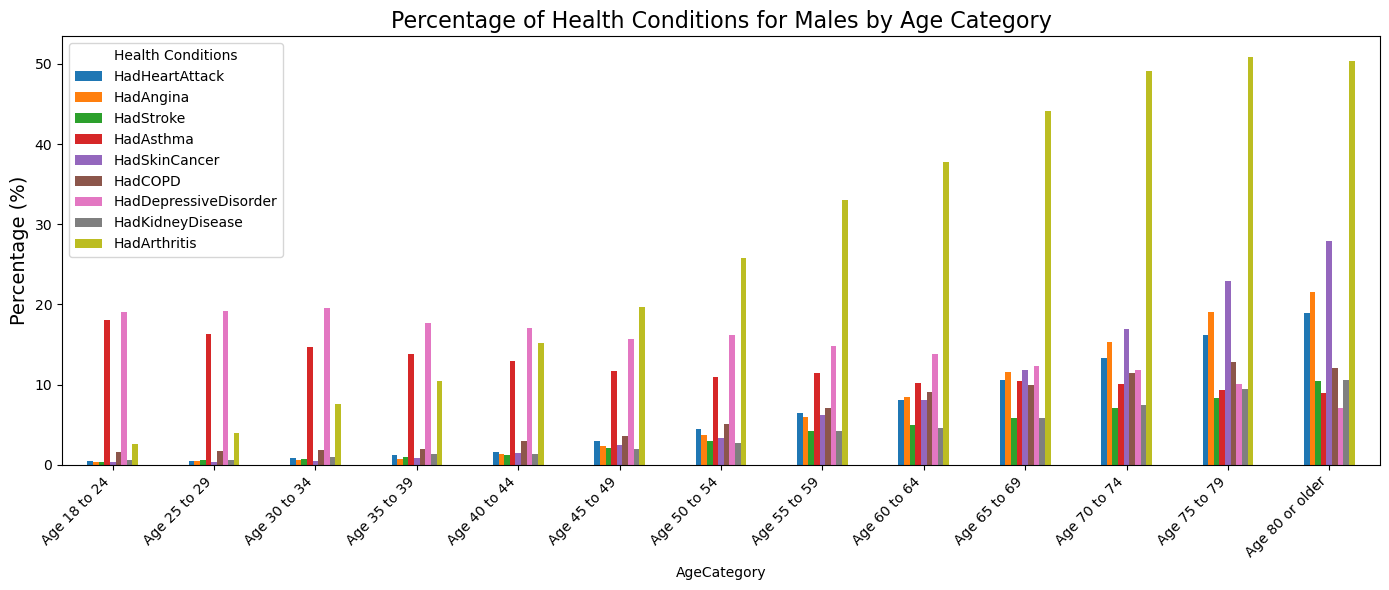

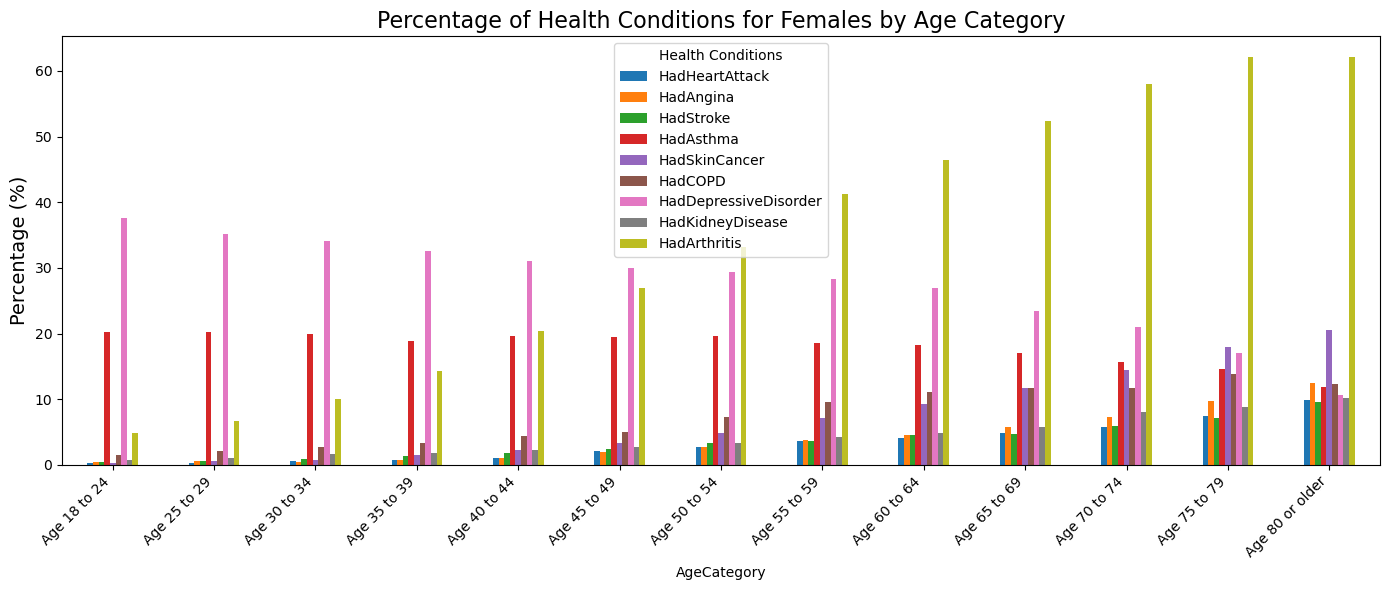

In [165]:
#plot for each one

import pandas as pd
import matplotlib.pyplot as plt

conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 
              'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
              'HadDepressiveDisorder', 'HadKidneyDisease', 
              'HadArthritis']

# Calculate percentage 
percentages = grouped3[conditions].div(grouped3['total'], axis=0) * 100

# Combine with original DataFrame
grouped3_percent = pd.concat([grouped3[['Sex', 'AgeCategory']], percentages], axis=1)

# Filter data for males and females
grouped3_male = grouped3_percent[grouped3_percent['Sex'] == 'Male']
grouped3_female = grouped3_percent[grouped3_percent['Sex'] == 'Female']

# Plot for Males
plt.figure(figsize=(14, 6))
grouped3_male.set_index('AgeCategory')[conditions].plot(kind='bar', ax=plt.gca())
plt.title('Percentage of Health Conditions for Males by Age Category', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Health Conditions')
plt.tight_layout()
plt.show()

# Plot for Females
plt.figure(figsize=(14, 6))
grouped3_female.set_index('AgeCategory')[conditions].plot(kind='bar', ax=plt.gca())
plt.title('Percentage of Health Conditions for Females by Age Category', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Health Conditions')
plt.tight_layout()
plt.show()

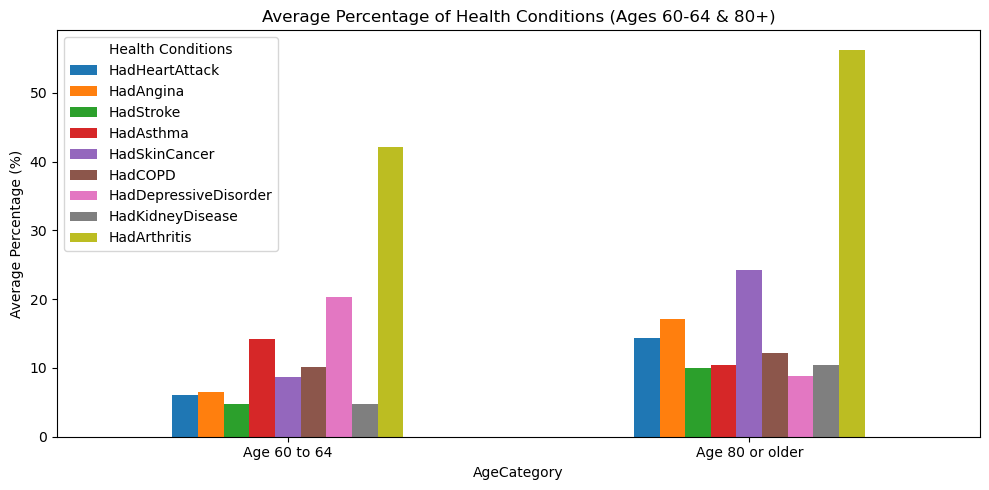

In [166]:

# Combine with original DataFrame
grouped3_percent = pd.concat([grouped3[['AgeCategory']], percentages], axis=1)

# Filter data for the specific age categories
age_filter = ['Age 60 to 64', 'Age 80 or older']
grouped3_filtered = grouped3_percent[grouped3_percent['AgeCategory'].isin(age_filter)]

# Group by AgeCategory and calculate mean percentage for each health condition
grouped3_general = grouped3_filtered.groupby('AgeCategory')[conditions].mean()

# Plot for General Overview
plt.figure(figsize=(10, 5))
grouped3_general.plot(kind='bar', ax=plt.gca())
plt.title('Average Percentage of Health Conditions (Ages 60-64 & 80+)')
plt.ylabel('Average Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Health Conditions')
plt.tight_layout()
plt.show()

In [159]:
health_df_nonull2=health_df_nonull.copy()
health_conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 
                     'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 
                     'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']

health_df_nonull2['HealthRiskScore'] = health_df_nonull2[health_conditions].sum(axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\2548494946.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  health_df_nonull2['HealthRiskScore'] = health_df_nonull2[health_conditions].sum(axis=1)


In [158]:
health_df_nonull2['HealthRiskScore'].unique()

array([1., 3., 0., 4., 2., 5., 6., 7., 8., 9.])

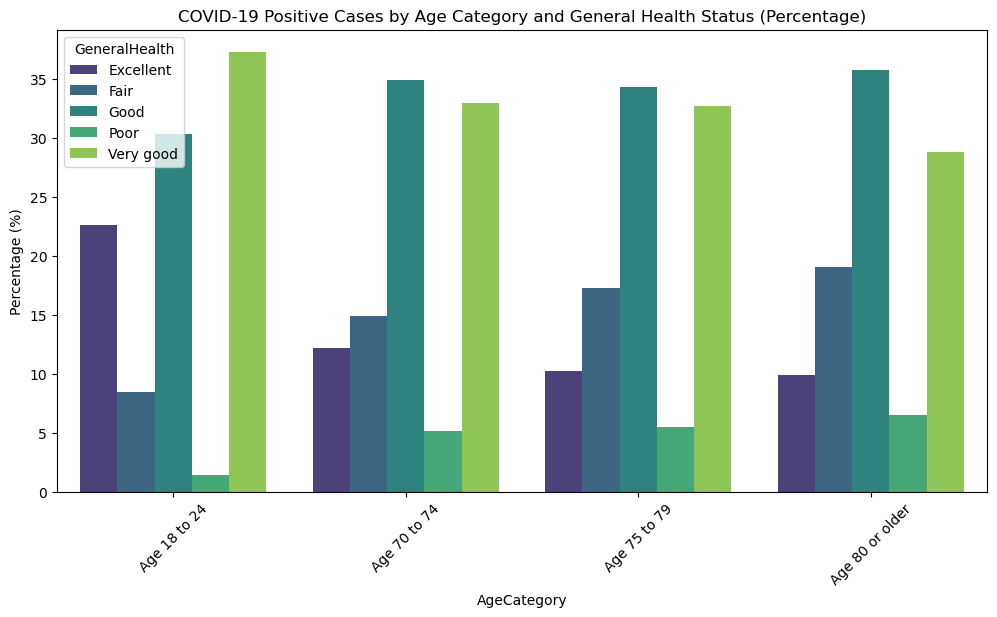

In [157]:
#health status with covid19

covid_df = health_df_nonull2[(health_df_nonull2['CovidPos'] == 1) & (health_df_nonull2['AgeCategory'].isin(['Age 18 to 24', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']))]

age_health_counts = covid_df.groupby(['AgeCategory', 'GeneralHealth']).size().reset_index(name='count')

age_health_counts['percentage'] = age_health_counts.groupby('AgeCategory')['count'].transform(lambda x: x / x.sum() * 100)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=age_health_counts, x='AgeCategory', y='percentage', hue='GeneralHealth', palette="viridis")
plt.title("COVID-19 Positive Cases by Age Category and General Health Status (Percentage)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

In [102]:
age_condition80 = health_df_nonull['AgeCategory'] == "Age 80 or older"
health_conditions4common = (
    (health_df_nonull['HadArthritis'] == 1) |
    (health_df_nonull['HadHeartAttack'] == 1) |
    (health_df_nonull['HadSkinCancer'] == 1) |
    (health_df_nonull['HadAngina'] == 1)
)

# Apply both filters to create the new grouped DataFrame
elderly_with_conditions = health_df_nonull[age_condition80 & health_conditions4common]

In [104]:
elderly_with_conditions

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,None of them,0.0,...,1.70,90.72,31.32,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,1
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1.0,5.0,1 to 5,0.0,...,1.55,79.38,33.07,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0
385,Alabama,Male,Poor,30.0,0.0,Within past year (anytime less than 12 months ...,0.0,9.0,1 to 5,0.0,...,1.80,88.45,27.20,0.0,0.0,1.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
392,Alabama,Male,Good,4.0,0.0,Within past year (anytime less than 12 months ...,0.0,10.0,1 to 5,0.0,...,1.68,95.25,33.89,0.0,0.0,1.0,1.0,"Yes, received Tdap",0.0,0
397,Alabama,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,0.0,7.0,"6 or more, but not all",0.0,...,1.80,104.33,32.08,0.0,0.0,1.0,1.0,"Yes, received Tdap",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444634,Virgin Islands,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,10.0,1 to 5,0.0,...,1.52,89.81,38.67,0.0,0.0,1.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
444711,Virgin Islands,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,6.0,All,0.0,...,1.55,72.57,30.23,0.0,0.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,0
444746,Virgin Islands,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,0.0,10.0,None of them,0.0,...,1.65,95.25,34.95,1.0,0.0,1.0,1.0,"Yes, received tetanus shot, but not Tdap",0.0,0
444862,Virgin Islands,Female,Very good,2.0,4.0,Within past year (anytime less than 12 months ...,1.0,6.0,1 to 5,0.0,...,1.70,73.48,25.37,0.0,1.0,0.0,1.0,"Yes, received Tdap",0.0,0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\1252945357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=elderly_with_conditions, x='GeneralHealth', palette="viridis")


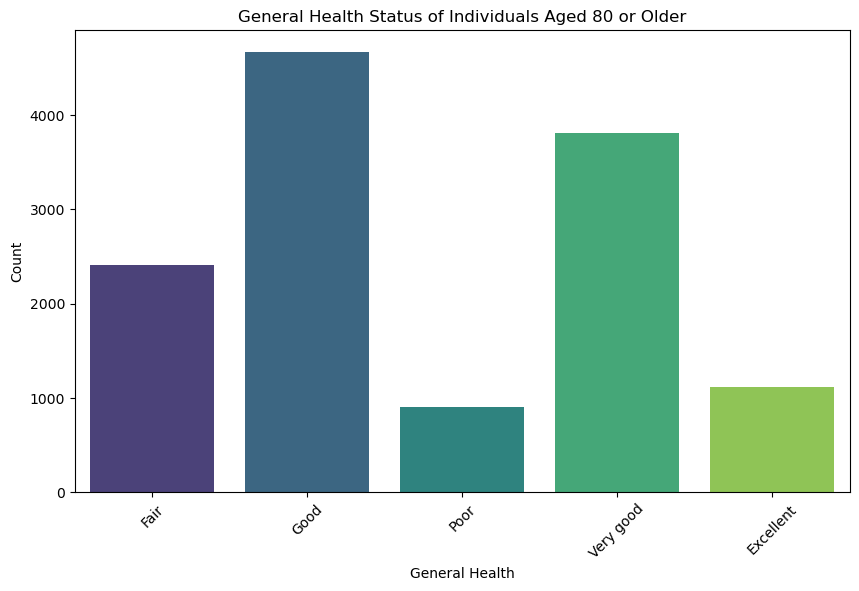

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=elderly_with_conditions, x='GeneralHealth', palette="viridis")
plt.title('General Health Status of Individuals Aged 80 or Older')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\2139814272.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=group_smoker, x='GeneralHealth', palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\2139814272.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=group_smoker_alcohol, x='GeneralHealth', palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\2139814272.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=group_smoker_alcohol_bmi, x='GeneralHealth', palette='viridis')


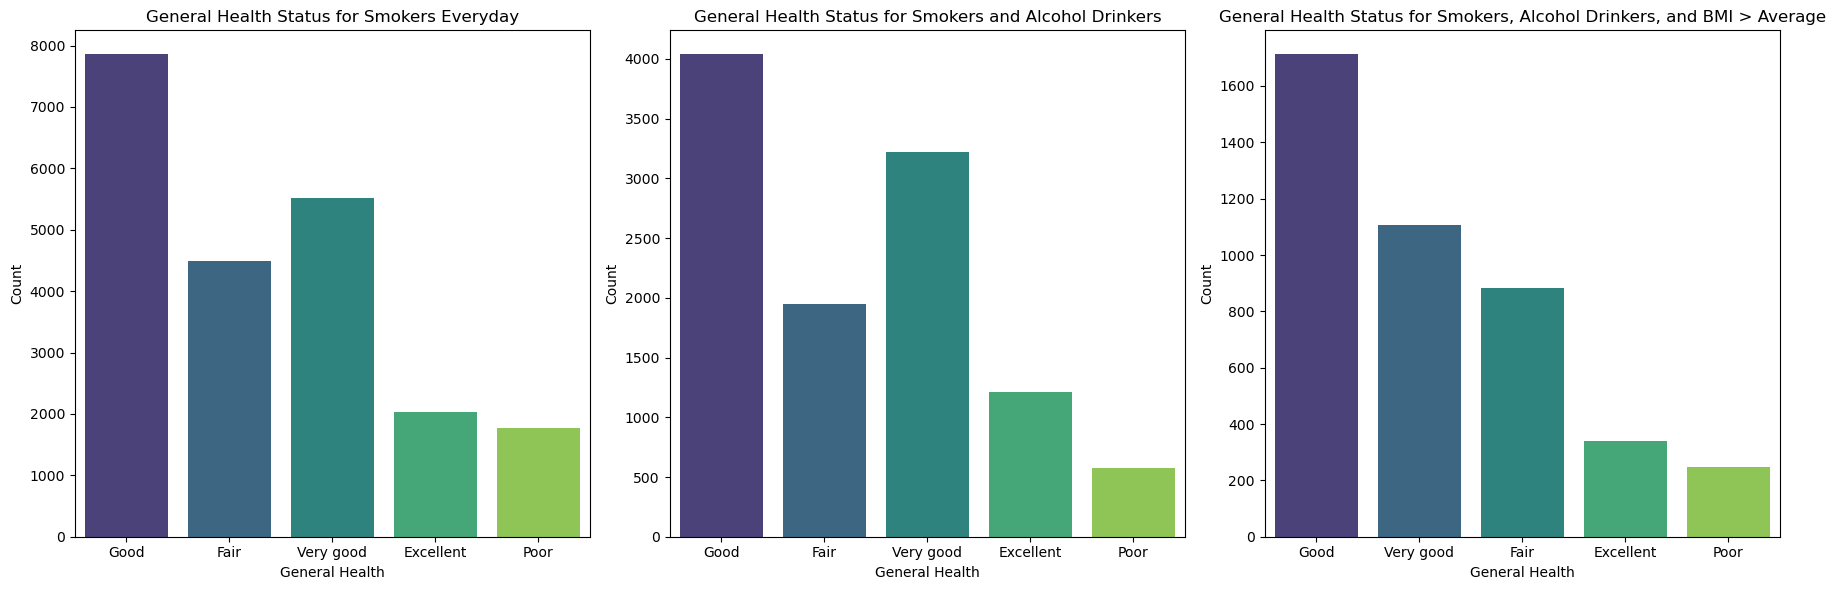

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


average_bmi = health_df_nonull['BMI'].mean()


group_smoker = health_df_nonull[health_df_nonull['SmokerStatus'] == 3]

group_smoker_alcohol = health_df_nonull[(health_df_nonull['SmokerStatus'] == 3) & (health_df_nonull['AlcoholDrinkers'] == 1)]

group_smoker_alcohol_bmi = health_df_nonull[(health_df_nonull['SmokerStatus'] == 3) & (health_df_nonull['AlcoholDrinkers'] == 1) & 
                                             (health_df_nonull['BMI'] > average_bmi)]


plt.figure(figsize=(18, 6))

# Create the first plot for SmokerStatus = 3
plt.subplot(1, 3, 1)
sns.countplot(data=group_smoker, x='GeneralHealth', palette='viridis')
plt.title("General Health Status for Smokers Everyday")
plt.xlabel("General Health")
plt.ylabel("Count")

# Create the second plot for SmokerStatus = 3 and AlcoholDrinkers = 1
plt.subplot(1, 3, 2)
sns.countplot(data=group_smoker_alcohol, x='GeneralHealth', palette='viridis')
plt.title("General Health Status for Smokers and Alcohol Drinkers")
plt.xlabel("General Health")
plt.ylabel("Count")

# Create the third plot for SmokerStatus = 3, AlcoholDrinkers = 1, and BMI > average_bmi
plt.subplot(1, 3, 3)
sns.countplot(data=group_smoker_alcohol_bmi, x='GeneralHealth', palette='viridis')
plt.title("General Health Status for Smokers, Alcohol Drinkers, and BMI > Average")
plt.xlabel("General Health")
plt.ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\1985120294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers_df['Usage'] = 'Smoker'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_480\1985120294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecig_users_df['Usage'] = 'E-Cigarette User'


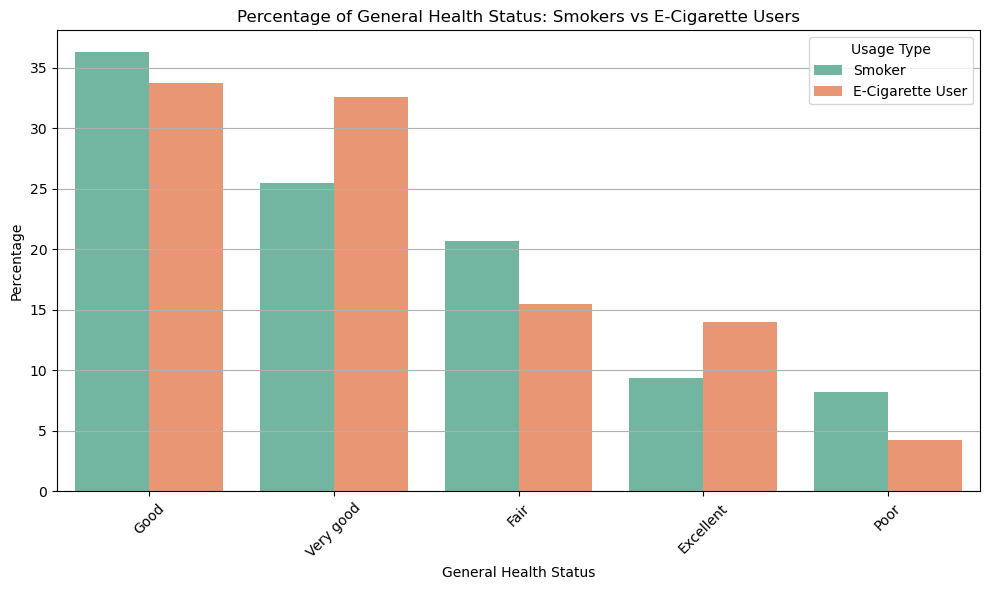

In [167]:



smokers_df = health_df_nonull[health_df_nonull['SmokerStatus'] == 3]
ecig_users_df = health_df_nonull[health_df_nonull['ECigaretteUsage'] == 'Use them every day']

smokers_df['Usage'] = 'Smoker'
ecig_users_df['Usage'] = 'E-Cigarette User'


combined_df = pd.concat([smokers_df[['GeneralHealth', 'Usage']], ecig_users_df[['GeneralHealth', 'Usage']]])


count_df = combined_df.value_counts(['GeneralHealth', 'Usage']).reset_index(name='Count')

# Calculate total counts for each usage category
total_count = count_df.groupby('Usage')['Count'].sum().reset_index(name='Total')

# Merge to calculate percentages
percentage_df = count_df.merge(total_count, on='Usage')
percentage_df['Percentage'] = (percentage_df['Count'] / percentage_df['Total']) * 100


plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='GeneralHealth', y='Percentage', hue='Usage', palette='Set2')


plt.title("Percentage of General Health Status: Smokers vs E-Cigarette Users")
plt.xlabel("General Health Status")
plt.ylabel("Percentage")
plt.xticks(rotation=45)  
plt.legend(title='Usage Type')
plt.grid(axis='y') 

plt.tight_layout()
plt.show()


In [172]:
df_male = grouped3[grouped3['Sex'] == 'Male']
df_male

,Sex,AgeCategory,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,total
13,Male,Age 18 to 24,37.0,29.0,28.0,1360.0,27.0,117.0,1436.0,49.0,195.0,7517
14,Male,Age 25 to 29,29.0,29.0,32.0,974.0,20.0,100.0,1140.0,33.0,239.0,5954
15,Male,Age 30 to 34,56.0,40.0,51.0,994.0,31.0,126.0,1322.0,63.0,512.0,6770
16,Male,Age 35 to 39,93.0,57.0,75.0,1058.0,63.0,155.0,1356.0,104.0,796.0,7653
17,Male,Age 40 to 44,132.0,104.0,94.0,1036.0,117.0,242.0,1368.0,112.0,1226.0,8040
18,Male,Age 45 to 49,237.0,185.0,165.0,947.0,196.0,287.0,1271.0,160.0,1594.0,8082
19,Male,Age 50 to 54,426.0,356.0,282.0,1040.0,319.0,482.0,1534.0,254.0,2452.0,9504
20,Male,Age 55 to 59,690.0,639.0,449.0,1219.0,658.0,763.0,1586.0,454.0,3536.0,10691
21,Male,Age 60 to 64,1004.0,1051.0,612.0,1267.0,1007.0,1141.0,1719.0,566.0,4719.0,12483
22,Male,Age 65 to 69,1438.0,1584.0,802.0,1430.0,1621.0,1361.0,1677.0,804.0,6034.0,13660
